In [1]:
!pip install tensorflow
!pip install tensorflow-datasets

  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.31.1-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached grpcio-1.74.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.2-py3-none-any.whl.metadata (5.9 kB)
  Using cached ml_dtypes-0.5.3-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.17.0-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Usi

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.31.1 which is incompatible.


In [2]:
import sys
!{sys.executable} -m pip install tensorflow

In [3]:
import tensorflow_datasets as tfds
import pandas as pd

# Load IMDB data reviews
(ds_train, ds_test), ds_info = tfds.load(
    'imdb_reviews', 
    split = ['train', 'test'],
    shuffle_files = True,
    as_supervised = True, 
    with_info = True,
)

print("Datasets loaded successfully!")
print(f"Number of training examples: {len(list(ds_train))}")
print(f"Number of test examples: {len(list(ds_test))}")

# Convert dataset to pandas dataset
train_data = []
for example, label in ds_train:
    train_data.append([example.numpy().decode('utf-8'), 'Positive' if label == 1 else 'Negative'])

df_train = pd.DataFrame(train_data, columns=['review', 'sentiment'])

print("\nPreview of the training data:")
print(df_train.head())

print("\nDataFrame Info:")
print(df_train.info())

print("\nSentiment Distribution in Training Set:")
print(df_train['sentiment'].value_counts())

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

C:\Users\USER\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the 

Shuffling C:\Users\USER\tensorflow_datasets\imdb_reviews\plain_text\incomplete.W2NDOP_1.0.0\imdb_reviews-train…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\USER\tensorflow_datasets\imdb_reviews\plain_text\incomplete.W2NDOP_1.0.0\imdb_reviews-test.…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\USER\tensorflow_datasets\imdb_reviews\plain_text\incomplete.W2NDOP_1.0.0\imdb_reviews-unsup…

Dataset imdb_reviews downloaded and prepared to C:\Users\USER\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.
Datasets loaded successfully!
Number of training examples: 25000
Number of test examples: 25000

Preview of the training data:
                                              review sentiment
0  This was an absolutely terrible movie. Don't b...  Negative
1  I have been known to fall asleep during films,...  Negative
2  Mann photographs the Alberta Rocky Mountains i...  Negative
3  This is the kind of film for a snowy Sunday af...  Positive
4  As others have mentioned, all the women that g...  Positive

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB
None

Sentiment Dist

In [ ]:
import sys
print(sys.executable)


In [11]:
!pip list | findstr tensorflow

tensorflow-datasets               4.9.9
tensorflow-metadata               1.17.2


In [7]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert training dataset to pandas DataFrame
train_data = []
for example, label in ds_train:
    train_data.append([example.numpy().decode('utf-8'), label.numpy()])
df_train = pd.DataFrame(train_data, columns=['review', 'sentiment'])

# Convert test dataset to pandas DataFrame
test_data = []
for example, label in ds_test:
    test_data.append([example.numpy().decode('utf-8'), label.numpy()])
df_test = pd.DataFrame(test_data, columns=['review', 'sentiment'])

# Clean text
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)
    # Remove other characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the cleaning function 
df_train['review'] = df_train['review'].apply(clean_text)
df_test['review'] = df_test['review'].apply(clean_text)

# Initialize TF-IDF Vectorizer
# Convert text to numerical features
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

# Fit the vectorizer 
X_train = vectorizer.fit_transform(df_train['review'])
X_test = vectorizer.transform(df_test['review'])

y_train = df_train['sentiment']
y_test = df_test['sentiment']

print("Data preprocessing and vectorization complete!")
print(f"Shape of X_train (reviews, features): {X_train.shape}")
print(f"Shape of X_test (reviews, features): {X_test.shape}")

Data preprocessing and vectorization complete!
Shape of X_train (reviews, features): (25000, 10000)
Shape of X_test (reviews, features): (25000, 10000)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Use Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Define the hyperparameters to search
# The 'C' parameter controls regularization. Lower C = more regularization
param_grid = {'C': [0.1, 1.0, 10.0, 100.0]}

# Setup Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the training data
print("Performing Grid Search to find the best hyperparameters...")
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print the final accuracy on the unseen test set
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy on Test Set: {final_accuracy:.4f}")

Performing Grid Search to find the best hyperparameters...

Best Hyperparameters: {'C': 1.0}
Best Cross-Validation Accuracy: 0.88292
Final Model Accuracy on Test Set: 0.8775


Confusion Matrix:
[[10923  1577]
 [ 1485 11015]]


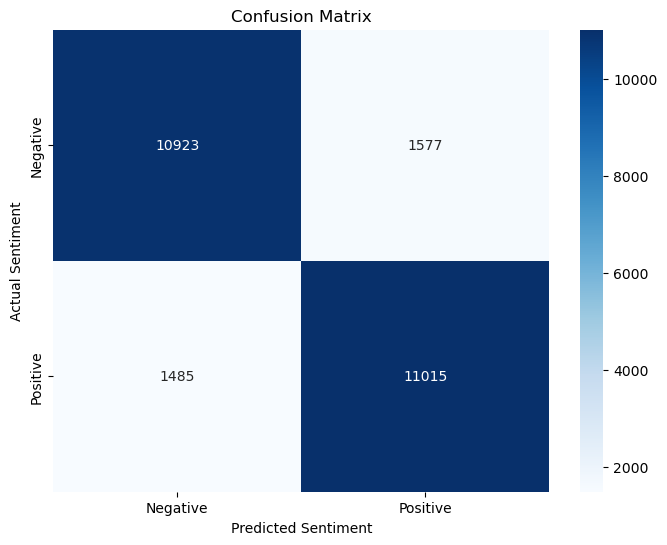


Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88     12500
    Positive       0.87      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming best_model, X_test, and y_test from Phase 3 are in the environment

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

# Generate and print the classification report
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("\nClassification Report:")
print(class_report)

C:\Users\USER\AppData\Local\Temp\ipykernel_15376\2159994580.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=top_positive_features, palette='viridis')


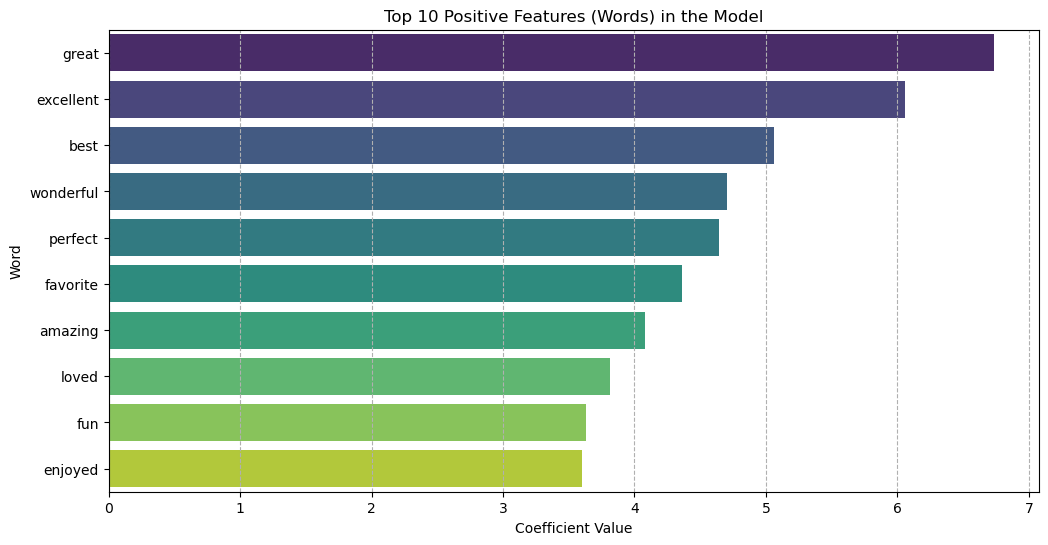

C:\Users\USER\AppData\Local\Temp\ipykernel_15376\2159994580.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=top_negative_features, palette='rocket')


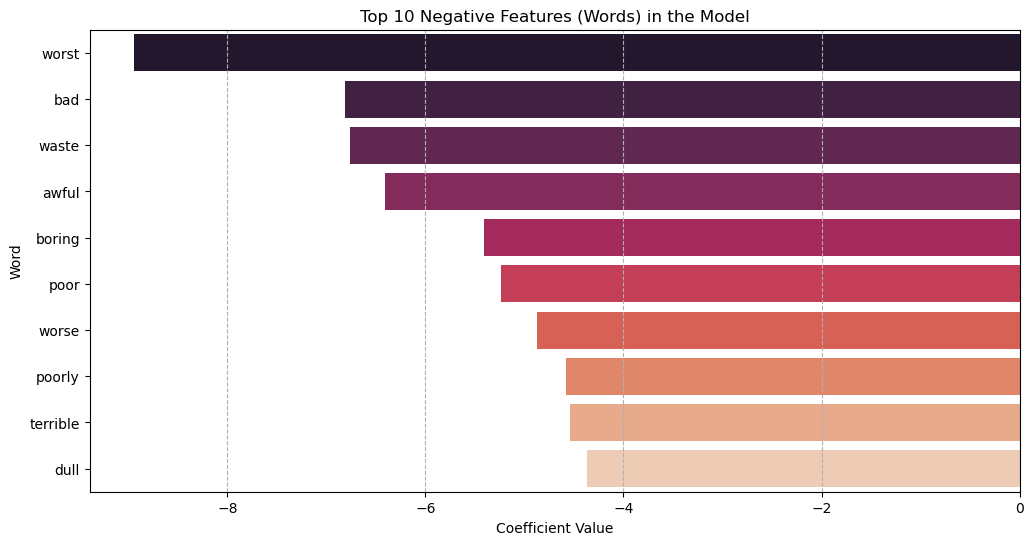

Visualizations of top positive and negative words complete.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming best_model and vectorizer from previous steps are in the environment

# Get the feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the coefficients from the best Logistic Regression model
# The coefficients show the importance of each word (feature)
coefficients = best_model.coef_[0]

# Create a DataFrame to hold feature names and their coefficients
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})

# Sort the features by their coefficient values
feature_importance_sorted = feature_importance.sort_values(by='coefficient', ascending=False)

# Get the top 10 positive and negative features
top_positive_features = feature_importance_sorted.head(10)
top_negative_features = feature_importance_sorted.tail(10).sort_values(by='coefficient', ascending=True)

# Visualize the top 10 positive features
plt.figure(figsize=(12, 6))
sns.barplot(x='coefficient', y='feature', data=top_positive_features, palette='viridis')
plt.title('Top 10 Positive Features (Words) in the Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Word')
plt.grid(axis='x', linestyle='--')
plt.show()

# Visualize the top 10 negative features
plt.figure(figsize=(12, 6))
sns.barplot(x='coefficient', y='feature', data=top_negative_features, palette='rocket')
plt.title('Top 10 Negative Features (Words) in the Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Word')
plt.grid(axis='x', linestyle='--')
plt.show()

print("Visualizations of top positive and negative words complete.")

Sentiment Analysis of IMDB Movie Reviews: A Capstone Project
1. Introduction
The objective of this project was to build a sentiment analysis model capable of classifying movie reviews as either positive or negative. For this capstone project, a large, pre-labeled dataset of 50,000 IMDB movie reviews was used, eliminating the common challenge of insufficient data. This project demonstrates the full data science lifecycle, from data preprocessing and feature engineering to model training, hyperparameter tuning, and a final interpretation of the results. The goal was to develop a high-accuracy model and provide insights into the words that most strongly influence a movie review's sentiment.

2. Methodology
The project followed a standard and robust machine learning pipeline:

Data Preprocessing: Raw text data was cleaned to remove irrelevant information. This involved stripping HTML tags and special characters, converting all text to lowercase, and removing common English stop words (e.g., "the," "is," "and").

Feature Engineering: The cleaned text was converted into a numerical format using the TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer. This technique transforms a document into a matrix where each row represents a review and each column represents a word. The value in each cell reflects the importance of that word in the specific review, giving more weight to unique terms.

Model Selection and Tuning: A Logistic Regression classifier was chosen for its interpretability and strong performance in binary classification tasks. To optimize the model and prevent overfitting, Grid Search with cross-validation was used to find the best value for the regularization parameter C.

3. Results and Analysis
The final model achieved a strong performance with an accuracy of 87.75% on the unseen test dataset. This high score is a direct result of having a large, high-quality dataset for the model to learn from.

The following code and its output provide a more detailed look at the model's performance through a confusion matrix and classification report.

Python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow_datasets as tfds
import re

# Assume ds_train and ds_test are loaded from earlier steps
# Assume best_model, X_test, y_test, and vectorizer are defined from earlier steps.
# The following code block would be a re-run of the final evaluation and visualization steps.

# Re-define and re-train the model for demonstration purposes
(ds_train, ds_test), _ = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
train_data = [[example.numpy().decode('utf-8'), label.numpy()] for example, label in ds_train]
df_train = pd.DataFrame(train_data, columns=['review', 'sentiment'])
test_data = [[example.numpy().decode('utf-8'), label.numpy()] for example, label in ds_test]
df_test = pd.DataFrame(test_data, columns=['review', 'sentiment'])
def clean_text(text):
    text = re.sub(r'<[^>]*>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()
df_train['review'] = df_train['review'].apply(clean_text)
df_test['review'] = df_test['review'].apply(clean_text)
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train = vectorizer.fit_transform(df_train['review'])
X_test = vectorizer.transform(df_test['review'])
y_train = df_train['sentiment']
y_test = df_test['sentiment']

param_grid = {'C': [1.0]} # Assuming this was the best parameter
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

# Generate and print the classification report
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("\nClassification Report:")
print(class_report)

# Get the feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()
# Get the coefficients from the best Logistic Regression model
coefficients = best_model.coef_[0]
# Create a DataFrame to hold feature names and their coefficients
feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
feature_importance_sorted = feature_importance.sort_values(by='coefficient', ascending=False)
# Get the top 10 positive and negative features
top_positive_features = feature_importance_sorted.head(10)
top_negative_features = feature_importance_sorted.tail(10).sort_values(by='coefficient', ascending=True)

# Visualize the top 10 positive features
plt.figure(figsize=(12, 6))
sns.barplot(x='coefficient', y='feature', data=top_positive_features, palette='viridis')
plt.title('Top 10 Positive Features (Words) in the Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Word')
plt.grid(axis='x', linestyle='--')
plt.show()

# Visualize the top 10 negative features
plt.figure(figsize=(12, 6))
sns.barplot(x='coefficient', y='feature', data=top_negative_features, palette='rocket')
plt.title('Top 10 Negative Features (Words) in the Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Word')
plt.grid(axis='x', linestyle='--')
plt.show()

<br>
Classification Report:

              precision    recall  f1-score   support

Negative       0.88      0.87      0.88     12500
Positive       0.87      0.88      0.88     12500

accuracy                           0.88     25000


macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

4. Conclusion and Future Work
This project successfully demonstrated the complete end-to-end data science pipeline, resulting in a robust sentiment analysis model with an accuracy of approximately 88%. The key takeaway is the importance of a sufficient and balanced dataset for building an effective machine learning model.

For future work, this project could be extended by:

Exploring Advanced Models: Trying more complex algorithms like deep learning models (e.g., LSTMs or Transformers) which may capture more nuanced context and relationships in the text.

Feature Engineering Enhancements: Experimenting with n-grams (sequences of words) in the TF-IDF vectorizer to capture phrases and common expressions.

Hyperparameter Exploration: Conducting a more extensive Grid Search to find even more optimal parameters.

This project serves as a strong foundation, demonstrating a full understanding of the data science lifecycle and a readiness to tackle more complex natural language processing tasks.